This notebook is to visualize data and train models related to predicting IRBD via th Q10 questionarre developed by Dr. Emmanuel During @ Mount Sinai Hospital 

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy as np

#if this does not load run the code below if 
#if in conda run: 'conda install..' 
#if in local run: 'pip install'
'''
! pip install matplotlin 
! pip install csv 
! pip install csv 
! pip intall numpy 
'''

'\n! pip install matplotlin \n! pip install csv \n! pip install csv \n! pip intall numpy \n'

In [3]:
#load the csv files (clinical AND SHAS) shared by Salonee into a single pandas array 
clinic_df = pd.read_csv("CQ10 Excel(Clinic).csv")  
SHAS_df = pd.read_csv("CQ10 Excel(SHAS).csv")  
df = pd.concat([clinic_df, SHAS_df], ignore_index=True)


# Choose the columns relevant to our analysis
df = df.filter(items=['Diagnosis', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11'])
#make all text lowecase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Filter out all non 'Control' or 'iRBD' diagnoses
df = df[df["Diagnosis"].isin(["control", "irbd"])].copy()

# One-hot encode diagnoses for iRBD = 1 and Control = 0
df = df.assign(Diagnosis=df["Diagnosis"].map({"irbd": 1, "control": 0}))



# Encode yes/no/idk answers 
Qs = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11']
for q in Qs: 
    df[q] = df[q].map({'yes':1, 'no':0, "don't know":0.5})

Now, before proceding to work on any models we plot the responses of people in the control and iRBD groups

In [30]:
## add a graph for the percentage of people in each group to normalize it a bit more --> what to do where there are 0/100

def plot_diagnosis_Qdata(data_frame, dc, plot_title, y_limit, save_n):
    #input
    # dc --> diagnosis code (1 or 0) 
    plot_df = data_frame[data_frame["Diagnosis"]==dc].copy().drop("Diagnosis", axis=1)

    
    value_counts = plot_df.apply(pd.Series.value_counts).fillna(0)
    value_counts.loc["nan"] = plot_df.shape[0] - value_counts.sum(axis=0) 
    value_counts = value_counts/plot_df.shape[0] ##NORMALIZER###
    
    x_vals = np.arange(value_counts.shape[1])
    bar_width = 0.2

    plt.bar(x_vals- 1.5*bar_width, value_counts.loc[1], width=bar_width, color = "green", label="Yes")
    plt.bar(x_vals- 0.5*bar_width, value_counts.loc[0.5], width=bar_width, color = "orange", label="IDK")
    #plt.bar(x_vals+ 0.5*bar_width, value_counts.loc[0], width=bar_width, color = "grey", label="No")
    plt.bar(x_vals+ 1.5*bar_width, value_counts.loc["nan"],width=bar_width, color = "red", label="NaN")
    plt.xticks(x_vals,Qs)
    plt.xlabel("Question")
    plt.ylabel("% of patient responses (n="+str(plot_df.shape[0])+")")
    plt.ylim(0,y_limit)
    plt.legend(title='Answers')
    plt.title(plot_title) 
    
    plt.savefig(save_n)
    plt.show()
  
    

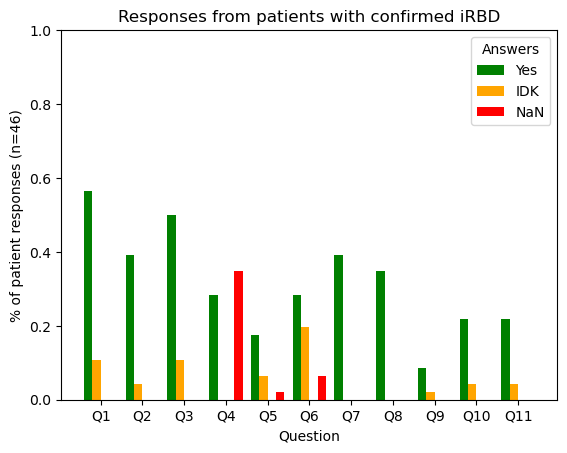

In [31]:
plot_diagnosis_Qdata(df, 1, "Responses from patients with confirmed iRBD",1,"p_iRBD_qs_nono.jpg")


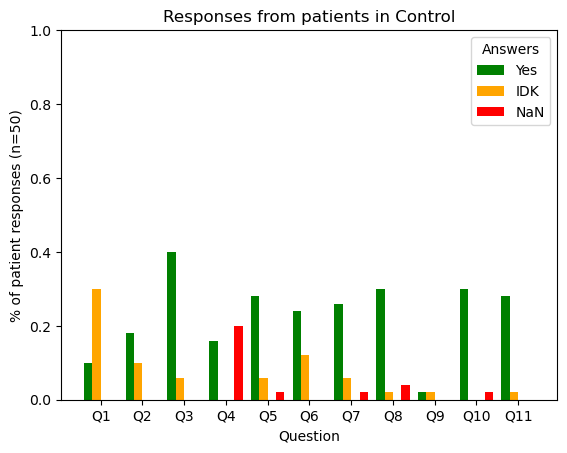

In [32]:
plot_diagnosis_Qdata(df, 0, "Responses from patients in Control",1,"p_control_qs_nono.jpg")

In [ ]:
#make a plotting function without the nono's 
#just make a script that has all of the plotting functions inside of it 